<a href="https://colab.research.google.com/github/aksha1234/selenium-youtube-scrapper/blob/main/code_04_XX_Iris_Deep_Learning_Classification_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Example - Iris 

This examples demonstrates the core deep learning model building concepts using the Keras library. The Iris flower dataset is used to build the model and perform classification tasks

### 5.1 Setup

In [1]:
#Install related libraries for the course. 
#This is a common requirement for all other exampels too

!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

### 4.2. Prepare Input Data for Deep Learning

Perform the following steps for preparing data

1. Load data into a pandas dataframe
2. Convert the dataframe to a numpy array
3. Scale the feature dataset
4. Use one-hot-encoding for the target variable
5. Split into training and test datasets


In [4]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [5]:
df=sns.load_dataset('iris')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
from sklearn.preprocessing import LabelEncoder


In [9]:
encoder=LabelEncoder().fit(df['species'])

In [10]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
encoder.transform(df.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
df['species']=encoder.transform(df.species)

In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df_numpy=df.to_numpy()  ## convert into the five array of size by 5

In [17]:
train_inputs=df_numpy[:,:4]

In [20]:
train_targets=df_numpy[:,4]

> Standardised teh data with the normal distribution having the 0 as means and 1 as variance ~N(0,1)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler().fit(train_inputs)

In [23]:
train_inputs=scaler.transform(train_inputs)

In [25]:
tf.keras.utils.to_categorical(train_targets);

In [26]:
train_targets=tf.keras.utils.to_categorical(train_targets)

In [28]:
print("\nFeatures after scaling :\n------------------------------------")
print(train_inputs[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(train_targets[:5,:])


Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after one-hot-encoding :
------------------------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [29]:
#Split training and test data

from sklearn.model_selection import train_test_split


In [30]:
train_inputs,test_inputs,train_targets,test_targets=train_test_split(train_inputs,train_targets,test_size=0.1,random_state=12)

### 4.3. Creating a Model

Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [33]:
from tensorflow import keras

In [34]:
#Number of classes in the target variable
NB_CLASSES=3

In [35]:
## Create a sequential model in Keras
model=tf.keras.models.Sequential()

In [36]:
## Add the first hidden layer
model.add(keras.layers.Dense(128,    ## Number of nodes
                             input_shape=(4,),  ### Number of input variables
                             name='Hiddden_layer-1', ## Logical NAme
                             activation='relu'))   ## Activation function

> Addinfg the second hiddenlayer with 128 nodes aand no need to **make input size one more time.**

In [37]:
model.add(keras.layers.Dense(128,name='Hidden-Layer-2',activation='relu'))

In [38]:
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax')) ## As we have multiclass variables

In [39]:
## compile the model with loss and metrics
model.compile(loss='categorical_crossentropy',metrics=['accuracy','MSE'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hiddden_layer-1 (Dense)     (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### 4.4. Training and evaluating the Model

Training the model involves defining various training models and then perform 
forward and back propagation.

In [42]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

In [43]:

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 


Training Progress:
------------------------------------


In [44]:
history=model.fit(train_inputs,train_targets,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=VERBOSE,validation_split=VALIDATION_SPLIT,workers=-1)

Epoch 1/10
7/7 [==============================] - 1s 42ms/step - loss: 0.7500 - accuracy: 0.8056 - MSE: 0.1417 - val_loss: 0.5749 - val_accuracy: 0.8148 - val_MSE: 0.1038
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5227 - accuracy: 0.8148 - MSE: 0.0948 - val_loss: 0.4542 - val_accuracy: 0.8148 - val_MSE: 0.0827
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4258 - accuracy: 0.8426 - MSE: 0.0778 - val_loss: 0.3915 - val_accuracy: 0.8519 - val_MSE: 0.0734
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3710 - accuracy: 0.8426 - MSE: 0.0697 - val_loss: 0.3616 - val_accuracy: 0.8519 - val_MSE: 0.0694
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3301 - accuracy: 0.8611 - MSE: 0.0623 - val_loss: 0.3320 - val_accuracy: 0.8889 - val_MSE: 0.0647
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.2928 - accuracy: 0.8889 - MSE: 0.0551 - val_loss: 0.3056 - val_accuracy: 0.92

In [49]:
pd.DataFrame(history.history)

,loss,accuracy,MSE,val_loss,val_accuracy,val_MSE
0,0.750049,0.805556,0.141740,0.574945,0.814815,0.103774
1,0.522685,0.814815,0.094813,0.454245,0.814815,0.082686
2,0.425789,0.842593,0.077750,0.391535,0.851852,0.073432
3,0.370973,0.842593,0.069675,0.361634,0.851852,0.069415
4,0.330076,0.861111,0.062343,0.331996,0.888889,0.064689
5,0.292833,0.888889,0.055079,0.305621,0.925926,0.059881
6,0.263579,0.888889,0.049987,0.321013,0.888889,0.062105
7,0.239611,0.935185,0.043931,0.283258,0.888889,0.055122
8,0.221153,0.925926,0.041124,0.262696,0.888889,0.051220
9,0.196258,0.962963,0.035039,0.242939,0.925926,0.047838


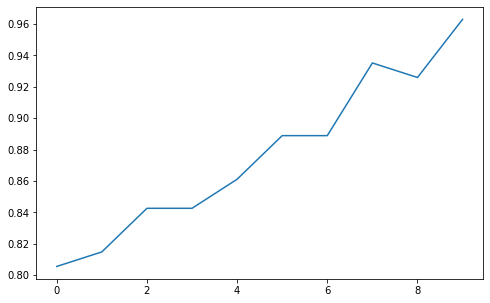

In [50]:
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))

In [52]:
import matplotlib.pyplot as plt


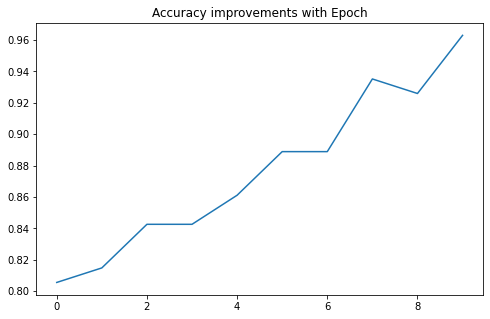

In [53]:
#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [54]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(test_inputs,test_targets)


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 22ms/step - loss: 0.1334 - accuracy: 1.0000 - MSE: 0.0227


[0.1334458291530609, 1.0, 0.02273540012538433]

### 4.5. Saving and Loading Models

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [55]:
#Saving a model
    
model.save("iris_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

INFO:tensorflow:Assets written to: iris_save/assets


INFO:tensorflow:Assets written to: iris_save/assets


In [56]:

#Print Model Summary
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hiddden_layer-1 (Dense)     (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### 4.6. Predictions with Deep Learning Models

In [57]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

In [60]:

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

In [61]:

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)



Raw Prediction Output (Probabilities) : [[0.0305592  0.6365892  0.33285156]]


In [62]:
#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", encoder.inverse_transform([prediction]))

Prediction is  ['versicolor']
